In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
import os

In [31]:
beforeC = covid0
afterC = covid1
afterC=afterC[afterC.index != '2020-02-29']
beforeC=beforeC["AMT"].astype(int)
afterC=afterC["AMT"].astype(int)

from scipy.stats import ttest_rel
result = ttest_rel(afterC, beforeC) 

print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 2.505 
p-value : 0.014


# create windows data

In [32]:
covid0_amt=covid0.values

In [33]:
def window(data, train_len, predict_len):
    s_len = train_len
    s_length = s_len + predict_len

    dataset = []
    for index in range(len(data)-s_length):
        dataset.append(data[index: index + s_length])
        
    return dataset

In [34]:
def normal(data):
    
    normal_data =[]
    
    for window in data:
        normal_window = [((float(p)/ float(window[0]))-1) for p in window]
        normal_data.append(normal_window)

    normal_ = np.array(normal_data)
    
    return normal_

In [35]:
dataset_covid0=window(covid0_amt, 4, 1)

In [36]:
dataset_covid0 = normal(dataset_covid0)

In [37]:
row0 = int(round(dataset_covid0.shape[0] * 0.7))
train0 = dataset_covid0[:row0,:]
np.random.shuffle(train0)

x_train0 = train0[:,:-1]
x_train0 = np.reshape(x_train0,(x_train0.shape[0],x_train0.shape[1],1))
y_train0 = train0[:,-1]

x_test0 = dataset_covid0[row0:,:-1]
x_test0 = np.reshape(x_test0,(x_test0.shape[0],x_test0.shape[1],1))
y_test0 = dataset_covid0[row0:,-1]

# LSTM covid0 2019 modeling

In [38]:
from tensorflow.keras.layers import LSTM 

In [39]:
lstm_covid0_model = Sequential() # Sequeatial Model 
lstm_covid0_model.add(LSTM(units = 256, input_shape=(x_train0.shape[1], 1),\
                           return_sequences=True)) # (timestep, feature) 
lstm_covid0_model.add(Dropout(0.6))
lstm_covid0_model.add(LSTM(64, return_sequences = True))
lstm_covid0_model.add(Dropout(0.3))
lstm_covid0_model.add(LSTM(32, return_sequences = True))
lstm_covid0_model.add(LSTM(32, return_sequences = False))
lstm_covid0_model.add(Dense(1, activation = 'linear'))
lstm_covid0_model.compile(loss='mean_squared_error', optimizer='adam') 
lstm_covid0_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 4, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 64)             82176     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [40]:
lstm_covid0_model.fit(x_train0, y_train0, epochs=120,
                      batch_size=1, verbose=1,validation_split=0.2)

Epoch 1/120
64/64 [==============================] - 1s 17ms/step - loss: 0.0699 - val_loss: 0.1067
Epoch 2/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0657 - val_loss: 0.0964
Epoch 3/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.0736
Epoch 4/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.0732
Epoch 5/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0526 - val_loss: 0.0881
Epoch 6/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.0726
Epoch 7/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0499 - val_loss: 0.0711
Epoch 8/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0815
Epoch 9/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0623
Epoch 10/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.0640
Epoch 11

64/64 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.0318
Epoch 84/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.0283
Epoch 85/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.0402
Epoch 86/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0343
Epoch 87/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0210
Epoch 88/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0272
Epoch 89/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.0223
Epoch 90/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.0345
Epoch 91/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0274
Epoch 92/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.0293
Epoch 93/120


In [41]:
y_pred0 = lstm_covid0_model.predict(x_test0)
print(y_pred0.shape)

(35, 1)


### Modeling result (covid0 2019)

In [42]:
result=mean_squared_error(y_test0, y_pred0)
print('lstm_covid1 :',result)

lstm_covid1 : 0.014532345791815691


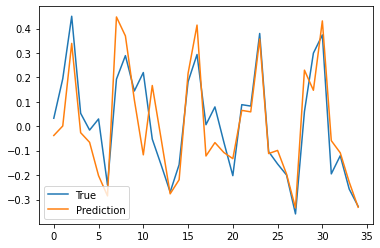

In [43]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test0,label = 'True')
ax.plot(y_pred0,label= 'Prediction')
ax.legend()
plt.show()
fig.savefig('lstm_covid0.png', dpi=fig.dpi)

In [44]:
from tensorflow.keras.models import load_model
lstm_covid0_model.save('lstm_covid0_model.h5')

In [45]:
pro_covid0=covid0.reset_index()

In [46]:
pro_covid0.rename(columns = {'STD_DD':'ds','AMT':'y'},inplace = True)

# Prophet (시계열 예측 데이터 생성 및 트렌드 분석)

In [47]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [48]:
prophet_covid0_model = Prophet(\
                       yearly_seasonality = False,
                       weekly_seasonality = 32,
                       daily_seasonality  =False,
                        changepoint_range=0.8,
                    changepoint_prior_scale=0.05)
prophet_covid0_model.add_seasonality(name='monthly', period=30.5, fourier_order=20)
prophet_covid0_model.fit(pro_covid0)

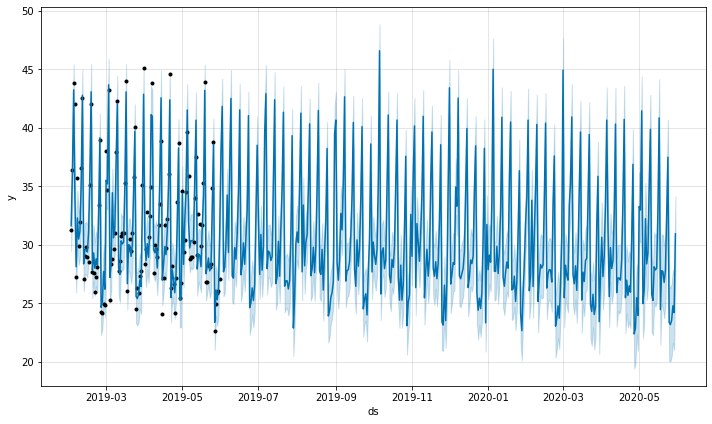

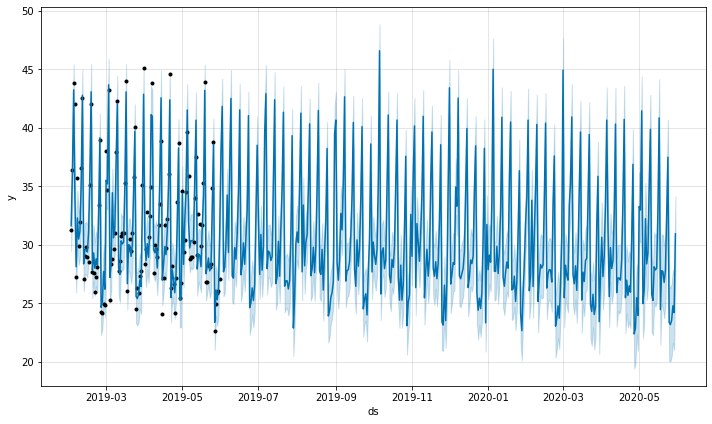

In [49]:
future_covid0 = prophet_covid0_model.make_future_dataframe(periods=365)

forecast_covid0 = prophet_covid0_model.predict(future_covid0)

prophet_covid0_model.plot(forecast_covid0)

In [50]:
split_date = pd.Timestamp('05-31-2019')

In [51]:
forecast_sample = forecast_covid0[["ds","yhat"]]

In [52]:
forecast_sample=forecast_sample.groupby("ds").sum()

### 실제값 예측값 구분

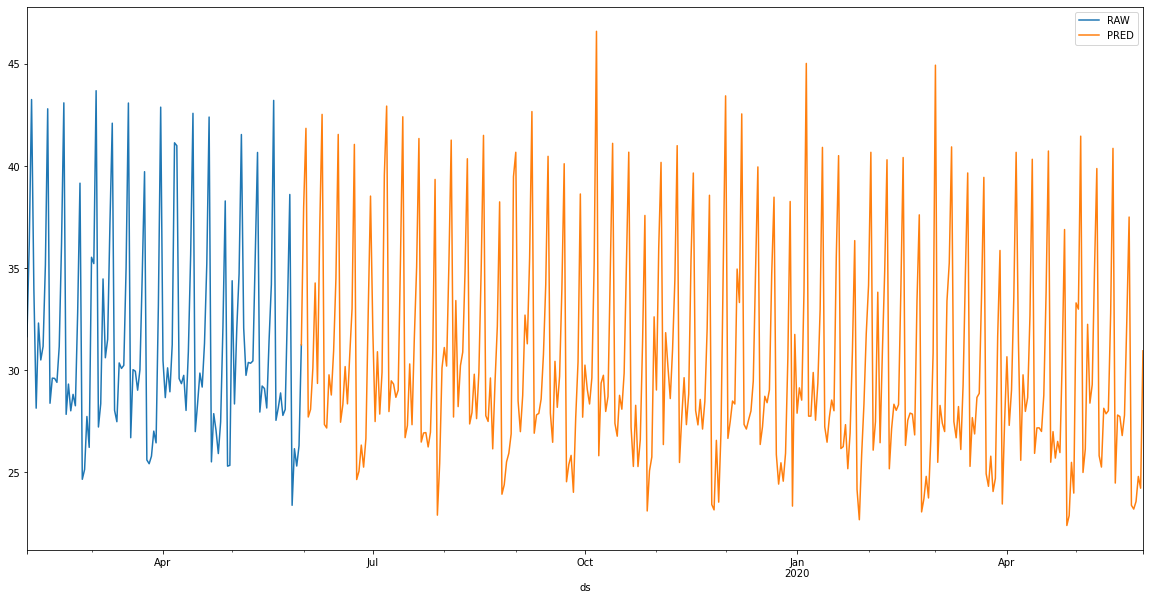

In [53]:
prophet_raw = forecast_sample.loc[:split_date, ['yhat']]
prophet_pred = forecast_sample.loc[split_date:, ['yhat']]


ax = prophet_raw.plot(figsize= (20,10))
prophet_pred.plot(ax=ax)
plt.legend(['RAW', 'PRED'])
plt.show()

In [54]:
def prophet_dataset(prophet_data,trainlen,predlen):
    test = window(prophet_data.values,trainlen,predlen)
    raw = window(prophet_data.values,trainlen,predlen)
    test = normal(test)
    raw = normal(raw)
    
    test = np.reshape(test,(test.shape[0],test.shape[1],1))
    raw = raw[:,-1]
    return (test,raw)
    

In [55]:
a,raw = prophet_dataset(prophet_raw,3,1)

In [56]:
pred = lstm_covid0_model.predict(a)

In [57]:
print(a.shape)
print(pred.shape)

(116, 4, 1)
(116, 1)


# Prophet 예측 데이터, Prophet 예측 데이터를 lstm으로 예측한것

### prophet 실제값 기반

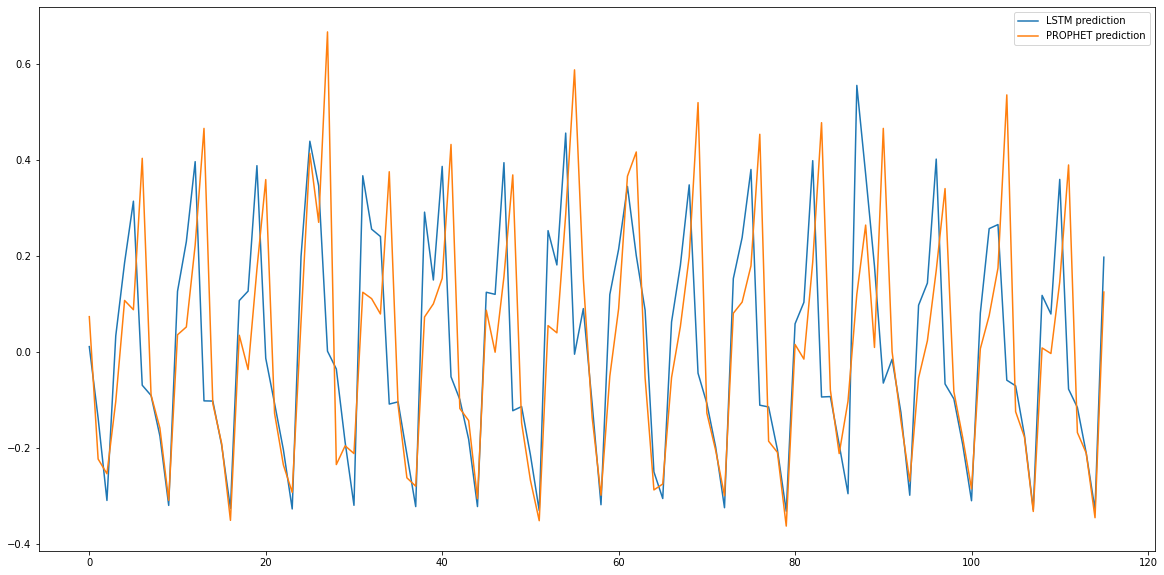

In [58]:
fig = plt.figure(facecolor = 'white',figsize= (20,10))

ax = fig.add_subplot(111)
ax.plot(pred,label = 'LSTM prediction')
ax.plot(raw,label= 'PROPHET prediction')
ax.legend()
plt.show()
fig.savefig('prophet_lstm_true0.png', dpi=fig.dpi)

In [59]:
pred_a,pred_b=prophet_dataset(prophet_pred,3,1)

In [60]:
pred_a=lstm_covid0_model.predict(pred_a)

### Prophet 예측값 기반 lstm 예측 비교

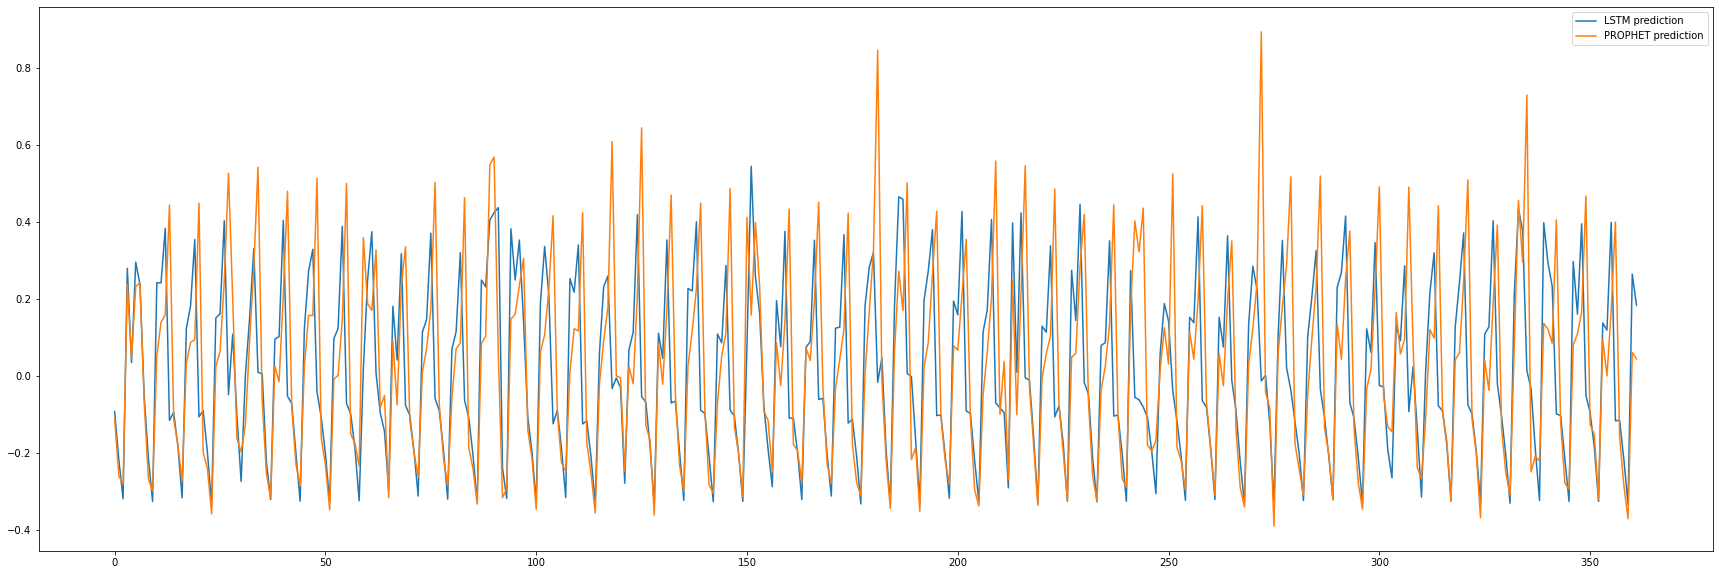

In [61]:
fig = plt.figure(facecolor = 'white',figsize= (30,10))

ax = fig.add_subplot(111)
ax.plot(pred_a,label = 'LSTM prediction')
ax.plot(pred_b,label= 'PROPHET prediction')
ax.legend()
plt.show()
fig.savefig('prophet_lstm_predict0.png', dpi=fig.dpi)

In [62]:
from scipy.stats import ttest_ind
result=ttest_ind(pd.Series(pred_a.reshape(362)),pd.Series(pred_b.reshape(362)))
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : -1.049 
p-value : 0.295


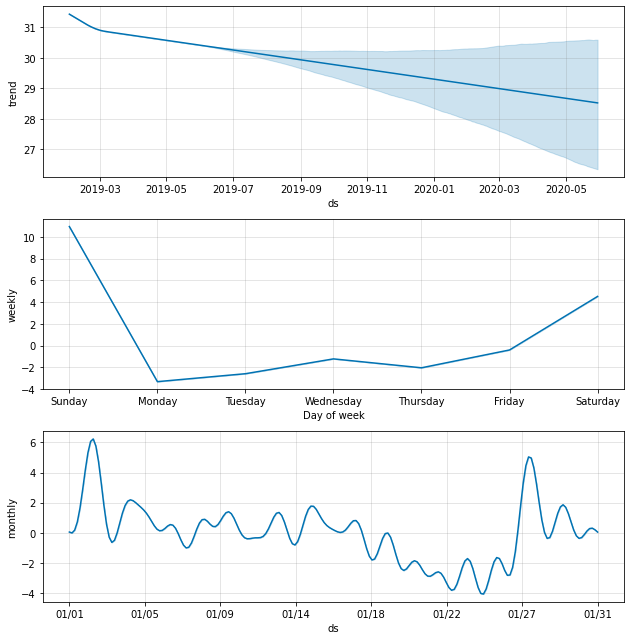

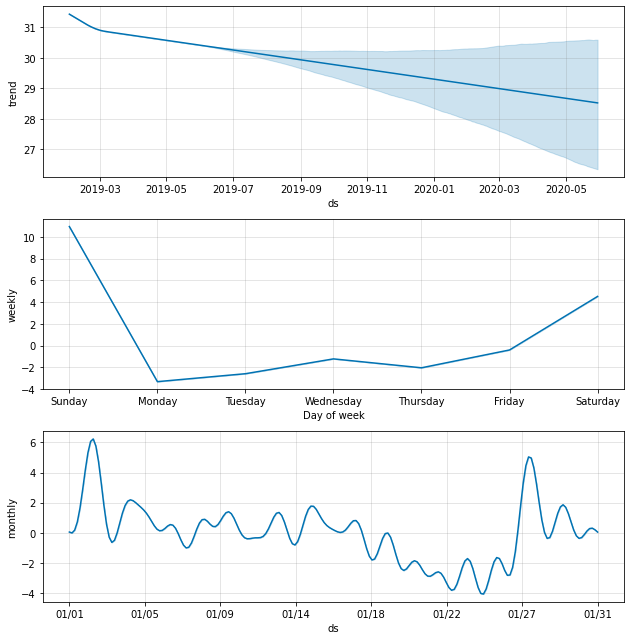

In [63]:
prophet_covid0_model.plot_components(forecast_covid0)

# COVID1 2020년 카드데이터 유통 소비 비율

### window data create

In [64]:
covid1_amt = covid1.values

In [65]:
dataset_covid1=window(covid1_amt,4,1)

In [66]:
dataset_covid1 = normal(dataset_covid1)

In [67]:
row1 = int(round(dataset_covid1.shape[0] * 0.7))
train1 = dataset_covid1[:row1,:]
np.random.shuffle(train1)

x_train1 = train1[:,:-1]
x_train1 = np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
y_train1 = train1[:,-1]

x_test1 = dataset_covid1[row1:,:-1]
x_test1 = np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
y_test1 = dataset_covid1[row1:,-1]

# lstm covid1 2020년 modeling

In [68]:
lstm_covid1_model = Sequential() # Sequeatial Model 
lstm_covid1_model.add(LSTM(units = 256, input_shape=(x_train0.shape[1], 1),\
                           return_sequences=True)) # (timestep, feature) 
lstm_covid1_model.add(Dropout(0.6))
lstm_covid1_model.add(LSTM(64, return_sequences = True))
lstm_covid1_model.add(Dropout(0.3))
lstm_covid1_model.add(LSTM(32, return_sequences = True))
lstm_covid1_model.add(LSTM(32, return_sequences = False))
lstm_covid1_model.add(Dense(1, activation = 'linear'))
lstm_covid1_model.compile(loss='mean_squared_error', optimizer='adam') 
lstm_covid1_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4, 256)            264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 256)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 4, 64)             82176     
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [69]:
lstm_covid1_model.fit(x_train1, y_train1, epochs=120,
                      batch_size=1, verbose=1,validation_split=0.2)

Epoch 1/120
64/64 [==============================] - 1s 17ms/step - loss: 0.0764 - val_loss: 0.0859
Epoch 2/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0753 - val_loss: 0.0827
Epoch 3/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0753 - val_loss: 0.0756
Epoch 4/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0714 - val_loss: 0.0571
Epoch 5/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0671 - val_loss: 0.0820
Epoch 6/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0718 - val_loss: 0.0575
Epoch 7/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0661 - val_loss: 0.0636
Epoch 8/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0620 - val_loss: 0.0585
Epoch 9/120
64/64 [==============================] - 0s 5ms/step - loss: 0.0598 - val_loss: 0.0433
Epoch 10/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0565 - val_loss: 0.0402
Epoch 11

64/64 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0157
Epoch 84/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0163
Epoch 85/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.0198
Epoch 86/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.0150
Epoch 87/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.0208
Epoch 88/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.0178
Epoch 89/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.0190
Epoch 90/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0207 - val_loss: 0.0173
Epoch 91/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.0136
Epoch 92/120
64/64 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.0203
Epoch 93/120


In [70]:
y_pred1 = lstm_covid1_model.predict(x_test1)
print(y_pred1.shape)

(35, 1)


In [71]:
from sklearn.metrics import mean_squared_error
result=mean_squared_error(y_test1, y_pred1)
print('lstm_covid1 MSE :',result)

lstm_covid1 MSE : 0.0851178415525058


# lstm covid1 2020년 modeling result

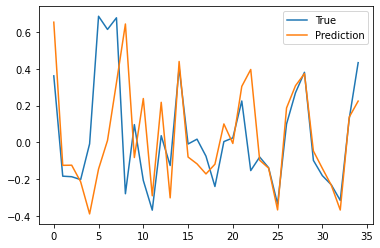

In [72]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test1,label = 'True')
ax.plot(y_pred1,label= 'Prediction')
ax.legend()
plt.show()
fig.savefig('lstmd_covid1.png', dpi=fig.dpi)

In [73]:
lstm_covid1_model.save('lstm_covid1_model.h5')

In [74]:
pro_covid1=covid1.reset_index()

In [75]:
pro_covid1.rename(columns = {'STD_DD':'ds','AMT':'y'},inplace=True)

In [76]:
prophet_covid1_model = Prophet(\
                       yearly_seasonality = False,
                       weekly_seasonality = 32,
                       daily_seasonality  =False,
                        changepoint_range=0.8,
                    changepoint_prior_scale=0.04)
prophet_covid1_model.add_seasonality(name='Monthly', period=30.5, fourier_order=20)
prophet_covid1_model.add_seasonality(name='Covid-19', period=120, fourier_order=10)
prophet_covid1_model.fit(pro_covid1)

# Prophet 2020년 예측값

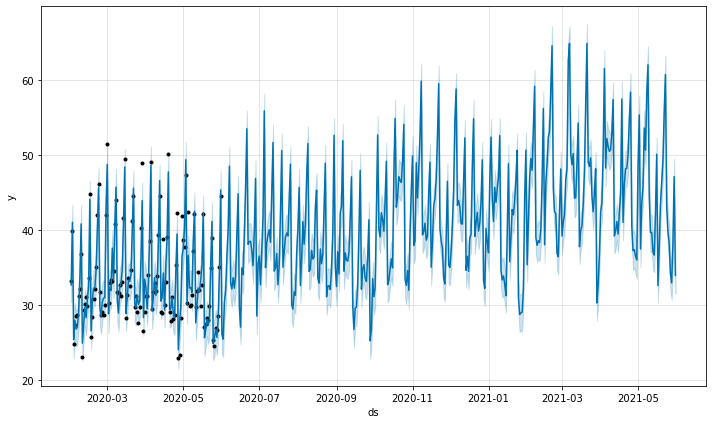

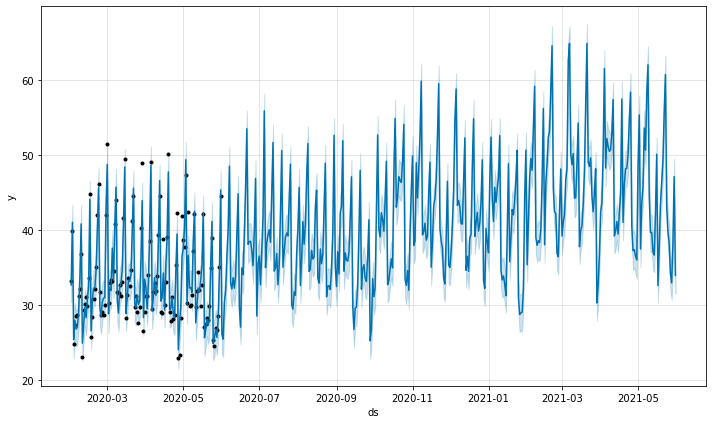

In [77]:
future_covid1 = prophet_covid1_model.make_future_dataframe(periods=365)

forecast_covid1 = prophet_covid1_model.predict(future_covid1)

prophet_covid1_model.plot(forecast_covid1)

In [78]:
split_date1 = pd.Timestamp('05-31-2020')

In [79]:
forecast_sample1 = forecast_covid1[["ds","yhat"]]

In [80]:
forecast_sample1=forecast_sample1.groupby("ds").sum()

# Prophet 2020 실제값과 예측값

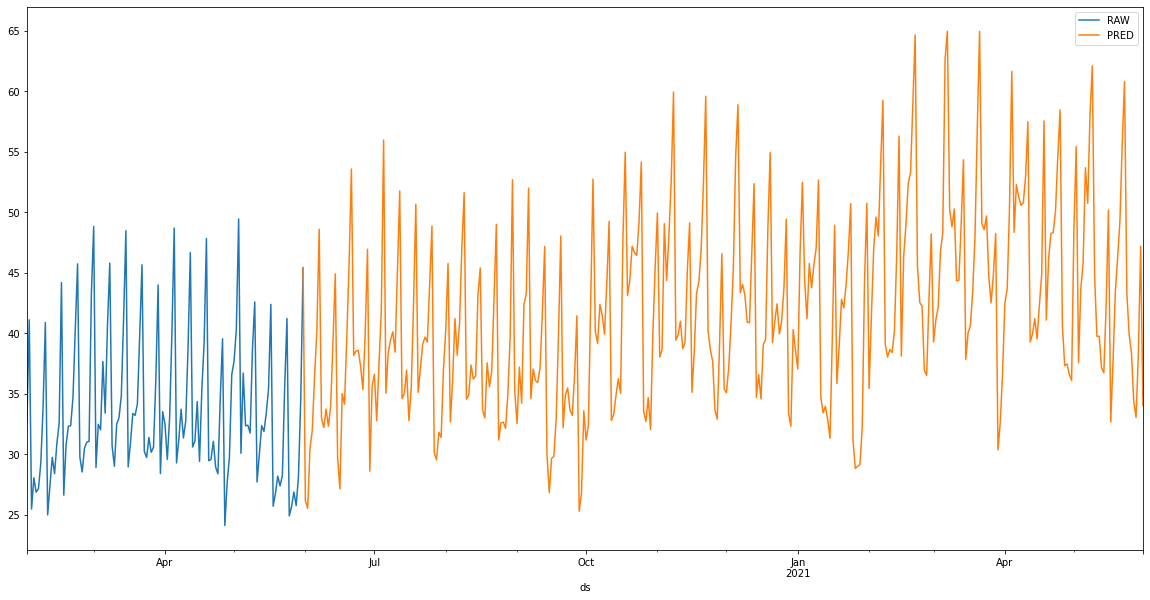

In [81]:
prophet_raw1 = forecast_sample1.loc[:split_date1, ['yhat']]
prophet_pred1 = forecast_sample1.loc[split_date1:, ['yhat']]


ax = prophet_raw1.plot(figsize= (20,10))
prophet_pred1.plot(ax=ax)
plt.legend(['RAW', 'PRED'])
plt.show()

In [82]:
a1,raw1 = prophet_dataset(prophet_raw1,3,1)

In [83]:
pred1 = lstm_covid1_model.predict(a1)

# 실제값 기반 Prophet 예측, lstm예측 비교

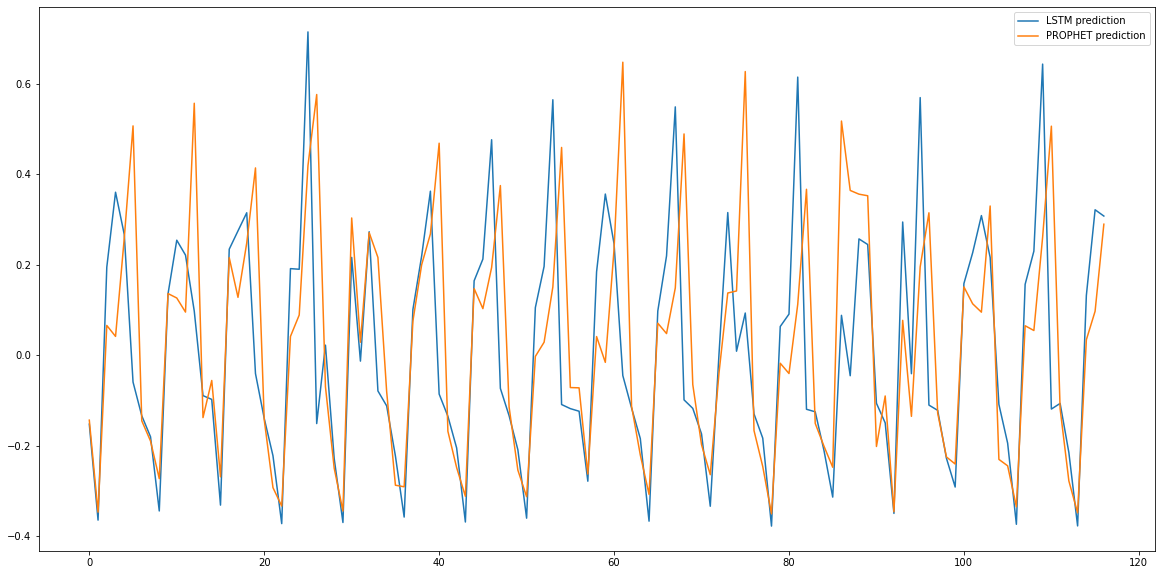

In [84]:
fig = plt.figure(facecolor = 'white',figsize= (20,10))

ax = fig.add_subplot(111)
ax.plot(pred1,label = 'LSTM prediction')
ax.plot(raw1,label= 'PROPHET prediction')
ax.legend()
plt.show()
fig.savefig('prophet_lstm_true1.png', dpi=fig.dpi)

In [85]:
pred_a1,pred_b1=prophet_dataset(prophet_pred1,3,1)

In [86]:
pred_a1=lstm_covid1_model.predict(pred_a1)

# Prophet 생성 데이터 기반 Prophet 예측값과 lstm 예측 비교

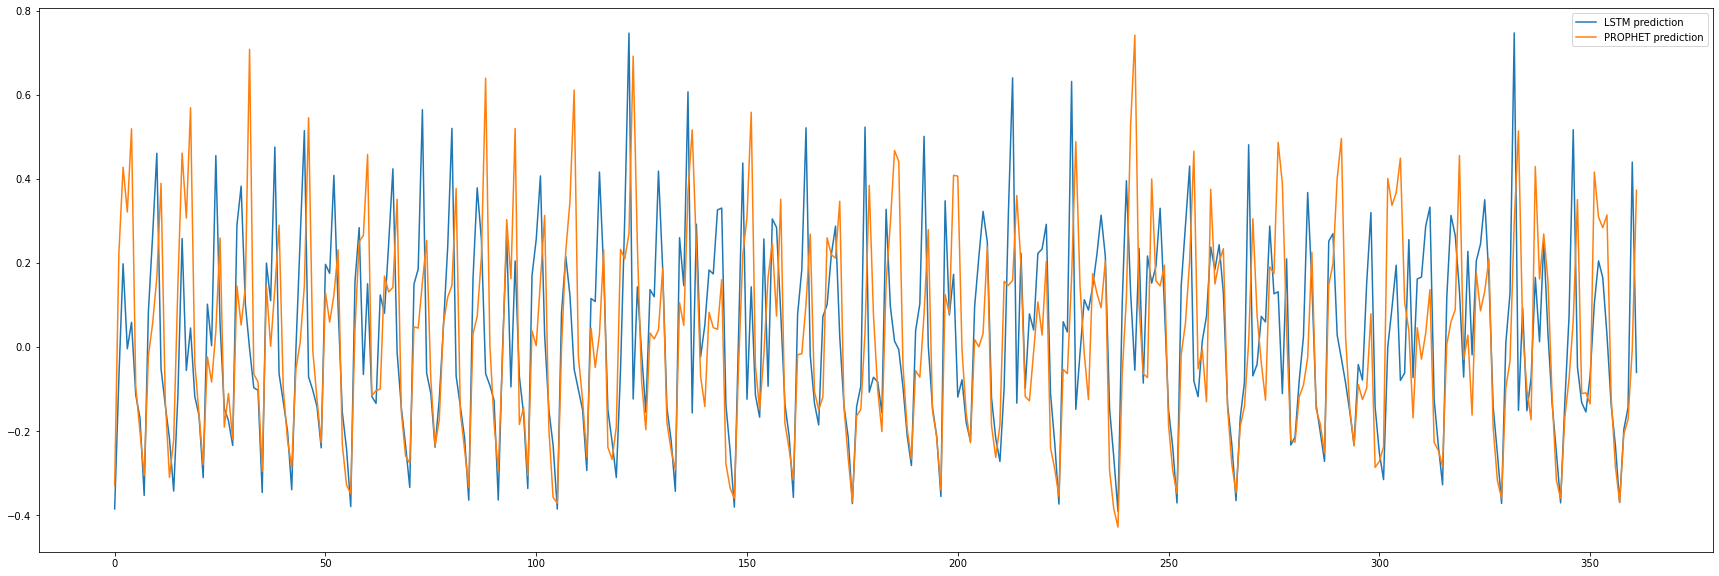

In [87]:
fig = plt.figure(facecolor = 'white',figsize= (30,10))

ax = fig.add_subplot(111)
ax.plot(pred_a1,label = 'LSTM prediction')
ax.plot(pred_b1,label= 'PROPHET prediction')
ax.legend()
plt.show()
fig.savefig('prophet_lstm_dummy1.png', dpi=fig.dpi)

In [88]:
result=ttest_ind(pd.Series(pred_a1.reshape(362)),pd.Series(pred_b1.reshape(362)))
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : -0.287 
p-value : 0.774


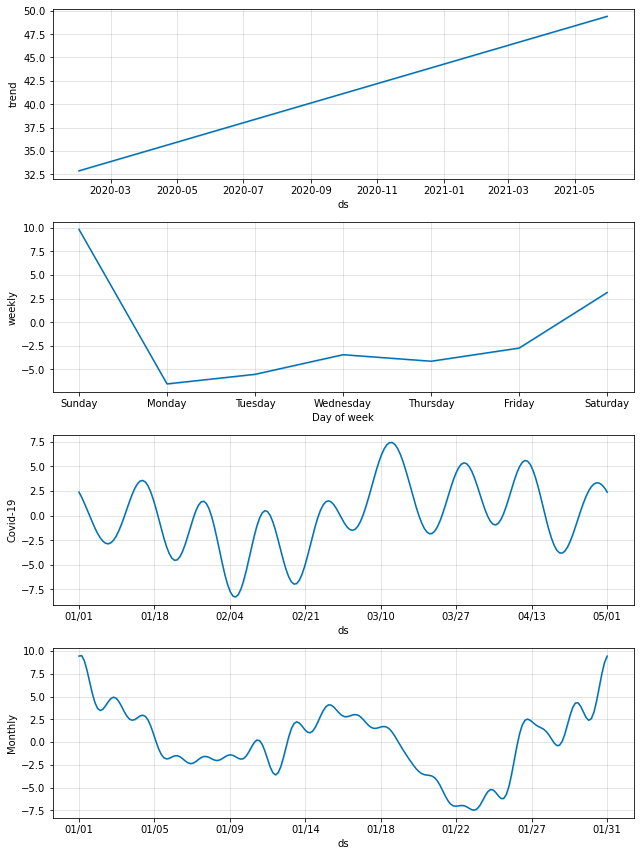

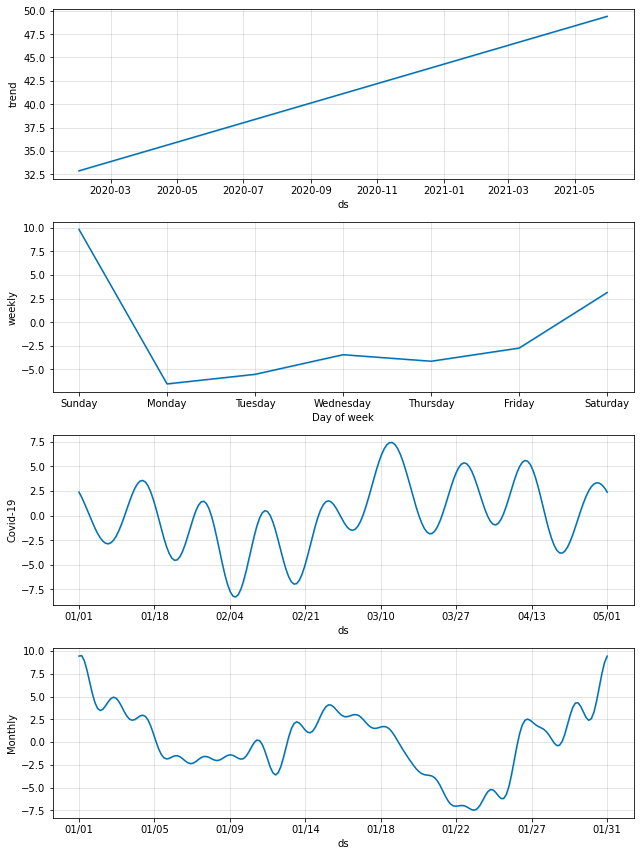

In [89]:
prophet_covid1_model.plot_components(forecast_covid1)

# Prophet 예측값 합친것

In [90]:
total=forecast_covid0[["ds","yhat"]].append(forecast_covid1[["ds","yhat"]])

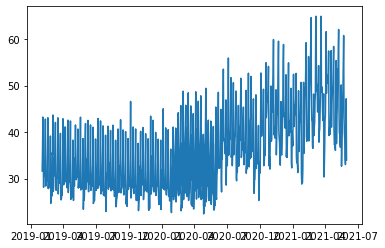

In [91]:
plt.plot(total["ds"],total["yhat"])